In [1]:
#Import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as MSE, r2_score
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit, KFold, cross_val_score


In [2]:
#Import dataset
data_relevant = pd.read_csv('data_relevant.csv')
data_relevant

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,21,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,25,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,26,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,34,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,39,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,30119,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006
2727,30128,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378
2728,30138,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753
2729,30142,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531


In [3]:
data_relevant = data_relevant.drop(columns=['Unnamed: 0'])

data_relevant.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923


In [4]:
data_relevant.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft
count,2.731000e+03,2731.000000,2731.000000,2731.000000,2731.00000,2731.0,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000
mean,8.426668e+05,3.308312,2.350787,1917.726474,22764.97803,1.0,467.283779,243.562798,1987.685829,98054.676309,7.497254,3.551080,450.318617
std,3.869865e+05,0.775164,0.590972,637.729194,51940.46294,0.0,207.968234,245.818677,9.918578,48.783832,0.783701,0.668393,168.290002
min,4.118100e+04,2.000000,1.000000,770.000000,1078.00000,1.0,0.000000,0.000000,1978.000000,98001.000000,6.000000,3.000000,22.943038
25%,5.700000e+05,3.000000,2.000000,1460.000000,7279.50000,1.0,420.000000,70.000000,1980.000000,98023.000000,7.000000,3.000000,335.714286
50%,7.300000e+05,3.000000,2.500000,1810.000000,9016.00000,1.0,480.000000,180.000000,1985.000000,98042.000000,7.000000,3.000000,418.139535
75%,1.011000e+06,4.000000,3.000000,2245.000000,13452.00000,1.0,550.000000,350.000000,1992.000000,98072.000000,8.000000,4.000000,542.151753
max,2.301000e+06,8.000000,7.000000,5490.000000,765753.00000,1.0,2210.000000,2200.000000,2022.000000,98354.000000,12.000000,5.000000,1707.317073


In [5]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

data_relevant['in_Seattle'] = np.where(data_relevant['postal_code'].isin(Seattle_postalcodes),1,0)

In [6]:
data_relevant['in_Seattle'].value_counts()

0    2515
1     216
Name: in_Seattle, dtype: int64

In [7]:
Seattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 1]
Seattle_Homes['price'].describe()

count    2.160000e+02
mean     8.952342e+05
std      3.145420e+05
min      1.220500e+05
25%      6.999875e+05
50%      8.390000e+05
75%      1.010250e+06
max      2.020000e+06
Name: price, dtype: float64

In [8]:
NotSeattle_Homes = data_relevant.loc[data_relevant['in_Seattle'] == 0]
NotSeattle_Homes['price'].describe()

count    2.515000e+03
mean     8.381521e+05
std      3.923093e+05
min      4.118100e+04
25%      5.600000e+05
50%      7.150000e+05
75%      1.012000e+06
max      2.301000e+06
Name: price, dtype: float64

In [9]:
data_relevant

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built,postal_code,grade_code,condition_code,price_sqft,in_Seattle
0,750000.0,3,2.0,1590,7754,1.0,440,0,1990,98038,7,4,471.698113,0
1,580000.0,3,3.0,2020,4482,1.0,600,120,1992,98031,7,3,287.128713,0
2,2000000.0,3,3.0,2700,7694,1.0,530,640,2006,98053,9,3,740.740741,0
3,785000.0,3,2.0,1350,7354,1.0,460,120,1985,98133,7,5,581.481481,1
4,1680000.0,3,2.5,5200,206039,1.0,1080,670,2007,98092,10,3,323.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,500000.0,3,2.5,1610,7250,1.0,490,270,1978,98168,7,3,310.559006,0
2727,560000.0,3,2.0,1480,8770,1.0,540,180,1985,98023,7,4,378.378378,0
2728,1011000.0,3,2.0,1460,10995,1.0,460,180,1981,98052,8,3,692.465753,0
2729,880000.0,4,2.5,2260,5661,1.0,460,230,2000,98108,8,3,389.380531,1


In [10]:
data_relevant = data_relevant[data_relevant['condition_code'] >= 3]

In [11]:
data_relevant['price'].min()

41181.0

In [12]:
data_relevant['price'].max()

2301000.0

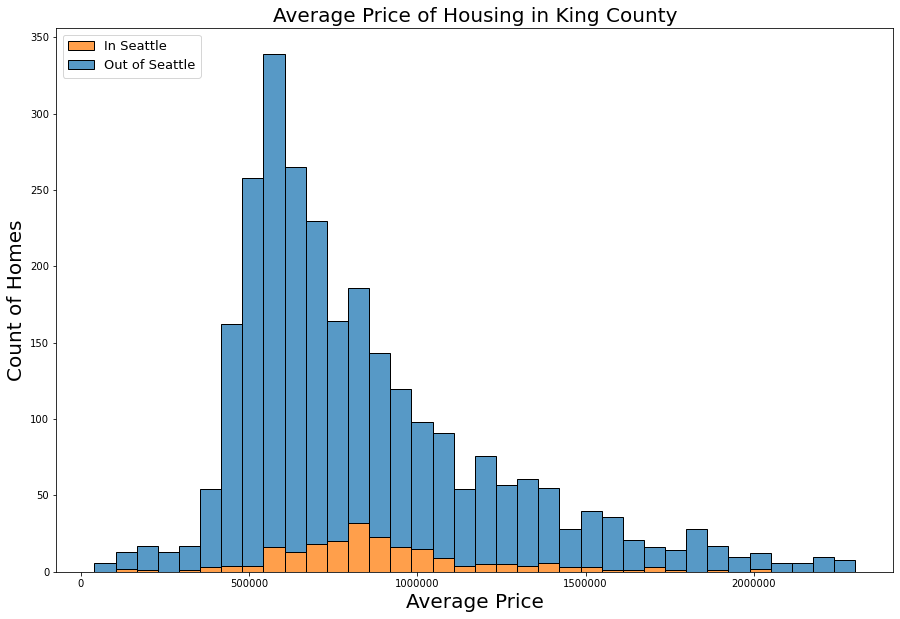

In [13]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker

sns.histplot(data_relevant, x="price", hue="in_Seattle", multiple="stack")
plt.legend(loc='upper left', labels=['In Seattle', 'Out of Seattle'], fontsize = 13)
ax.set_xlabel('Average Price', fontsize = 20)
ax.set_ylabel('Count of Homes', fontsize = 20)
ax.set_title('Average Price of Housing in King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='x');

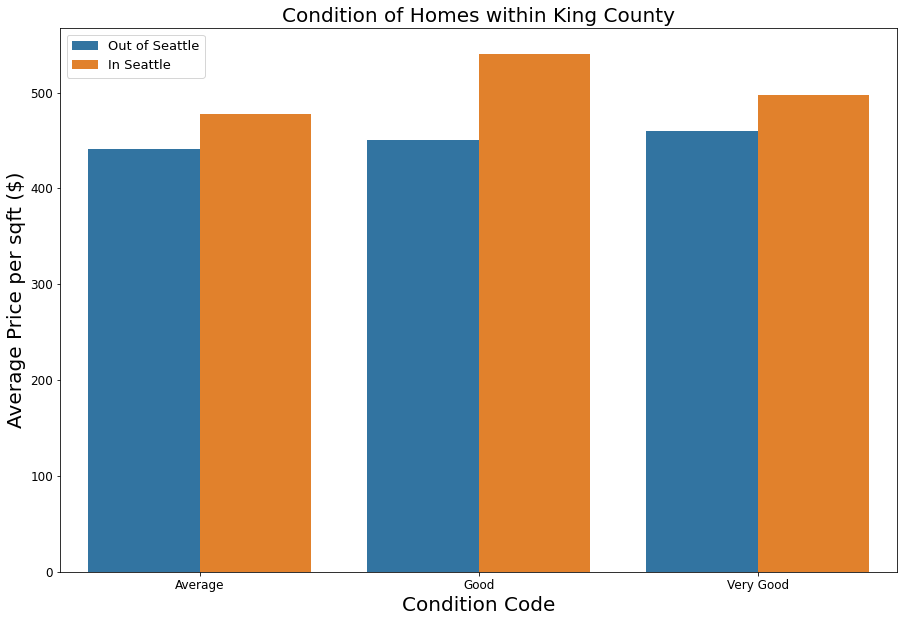

In [14]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=data_relevant["condition_code"], y=data_relevant['price_sqft'], hue=data_relevant["in_Seattle"], ci = None)
ax.legend(loc='upper left', labels=['Out of Seattle', 'In Seattle'], fontsize = 13)
ax.set_xlabel('Condition Code', fontsize = 20)
ax.set_ylabel('Average Price per sqft ($)', fontsize = 20)
ax.set_title('Condition of Homes within King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
ax.set_xticklabels(['Average','Good', 'Very Good'])
ax.tick_params(axis='both', which='major', labelsize=12);

In [15]:
data_relevant.condition_code.describe()

count    2731.000000
mean        3.551080
std         0.668393
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: condition_code, dtype: float64

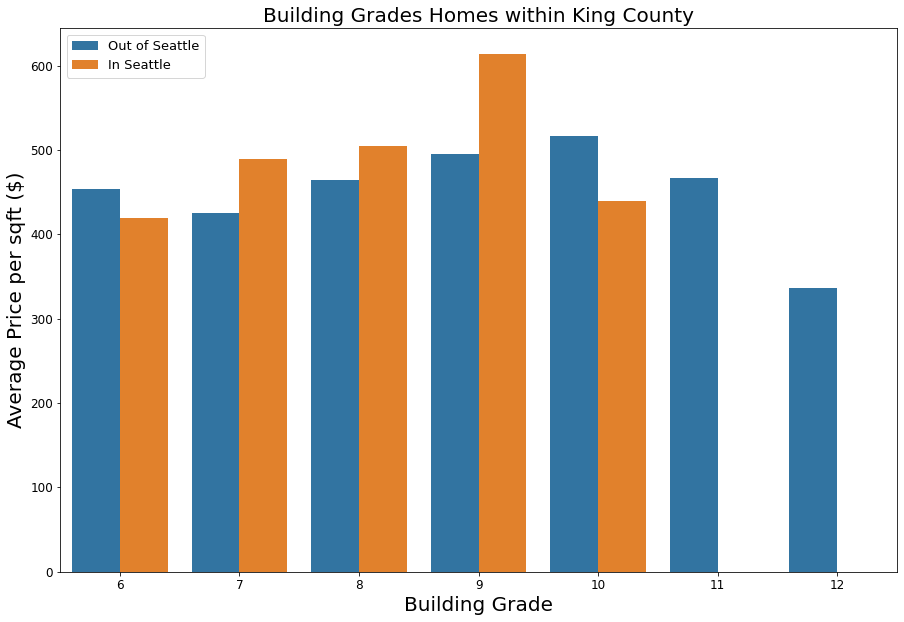

In [16]:
fig, ax = plt.subplots(figsize = (15 , 10))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=data_relevant["grade_code"], y=data_relevant['price_sqft'], hue=data_relevant["in_Seattle"], ci = None)
ax.legend(loc='upper left', labels=['Out of Seattle', 'In Seattle'], fontsize = 13)
ax.set_xlabel('Building Grade', fontsize = 20)
ax.set_ylabel('Average Price per sqft ($)', fontsize = 20)
ax.set_title('Building Grades Homes within King County', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
ax.tick_params(axis='both', which='major', labelsize=12);

## Creating a Map of the Dataset

### New Datasets with the In Seattle vs Out of Seattle Breakdown

In [17]:
data = pd.read_csv('data_cleaned.csv')
data

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft
0,21,2310000170,2/28/2022,750000.0,3,2.0,1590,7754,1.0,NO,...,0,1990,0,"27307 226th Avenue Southeast, Maple Valley, Wa...",47.357065,-122.040670,98038,7,4,471.698113
1,25,2095600170,10/8/2021,580000.0,3,3.0,2020,4482,1.0,NO,...,120,1992,0,"22609 102nd Place Southeast, Kent, Washington ...",47.399470,-122.204130,98031,7,3,287.128713
2,26,8682282030,5/4/2022,2000000.0,3,3.0,2700,7694,1.0,NO,...,640,2006,0,"23837 NE Adair Rd, Redmond, Washington 98053, ...",47.708760,-122.020730,98053,9,3,740.740741
3,34,5727500011,11/3/2021,785000.0,3,2.0,1350,7354,1.0,NO,...,120,1985,0,"16710 Meridian Avenue North, Shoreline, Washin...",47.751020,-122.334470,98133,7,5,581.481481
4,39,1421059003,8/25/2021,1680000.0,3,2.5,5200,206039,1.0,NO,...,670,2007,0,"15916 Southeast 326th Street, Auburn, Washingt...",47.310595,-122.129380,98092,10,3,323.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,30119,3821400080,7/23/2021,500000.0,3,2.5,1610,7250,1.0,NO,...,270,1978,0,"537 South 137th Place, Burien, Washington 9816...",47.479820,-122.325620,98168,7,3,310.559006
2727,30128,1761100480,2/8/2022,560000.0,3,2.0,1480,8770,1.0,NO,...,180,1985,0,"2213 Southwest 350th Place, Federal Way, Washi...",47.287330,-122.362055,98023,7,4,378.378378
2728,30138,2408100010,6/11/2021,1011000.0,3,2.0,1460,10995,1.0,NO,...,180,1981,0,"17414 Northeast 39th Court, Redmond, Washingto...",47.645550,-122.108060,98052,8,3,692.465753
2729,30142,2539500005,12/14/2021,880000.0,4,2.5,2260,5661,1.0,NO,...,230,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.568800,-122.295505,98108,8,3,389.380531


In [18]:
mapdata = data.copy()

In [19]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

mapdata['in_Seattle'] = np.where(mapdata['postal_code'].isin(Seattle_postalcodes),1,0)
mapdata

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft,in_Seattle
0,21,2310000170,2/28/2022,750000.0,3,2.0,1590,7754,1.0,NO,...,1990,0,"27307 226th Avenue Southeast, Maple Valley, Wa...",47.357065,-122.040670,98038,7,4,471.698113,0
1,25,2095600170,10/8/2021,580000.0,3,3.0,2020,4482,1.0,NO,...,1992,0,"22609 102nd Place Southeast, Kent, Washington ...",47.399470,-122.204130,98031,7,3,287.128713,0
2,26,8682282030,5/4/2022,2000000.0,3,3.0,2700,7694,1.0,NO,...,2006,0,"23837 NE Adair Rd, Redmond, Washington 98053, ...",47.708760,-122.020730,98053,9,3,740.740741,0
3,34,5727500011,11/3/2021,785000.0,3,2.0,1350,7354,1.0,NO,...,1985,0,"16710 Meridian Avenue North, Shoreline, Washin...",47.751020,-122.334470,98133,7,5,581.481481,1
4,39,1421059003,8/25/2021,1680000.0,3,2.5,5200,206039,1.0,NO,...,2007,0,"15916 Southeast 326th Street, Auburn, Washingt...",47.310595,-122.129380,98092,10,3,323.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,30119,3821400080,7/23/2021,500000.0,3,2.5,1610,7250,1.0,NO,...,1978,0,"537 South 137th Place, Burien, Washington 9816...",47.479820,-122.325620,98168,7,3,310.559006,0
2727,30128,1761100480,2/8/2022,560000.0,3,2.0,1480,8770,1.0,NO,...,1985,0,"2213 Southwest 350th Place, Federal Way, Washi...",47.287330,-122.362055,98023,7,4,378.378378,0
2728,30138,2408100010,6/11/2021,1011000.0,3,2.0,1460,10995,1.0,NO,...,1981,0,"17414 Northeast 39th Court, Redmond, Washingto...",47.645550,-122.108060,98052,8,3,692.465753,0
2729,30142,2539500005,12/14/2021,880000.0,4,2.5,2260,5661,1.0,NO,...,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.568800,-122.295505,98108,8,3,389.380531,1


In [20]:
df_seattle = mapdata.copy()

In [21]:
df_notseattle = mapdata.copy()

In [22]:
Seattle_Homes = df_seattle.loc[df_seattle['in_Seattle'] == 1]
Seattle_Homes

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft,in_Seattle
3,34,5727500011,11/3/2021,785000.0,3,2.0,1350,7354,1.0,NO,...,1985,0,"16710 Meridian Avenue North, Shoreline, Washin...",47.751020,-122.334470,98133,7,5,581.481481,1
33,351,3438501862,3/11/2022,765000.0,3,2.5,1450,5008,1.0,NO,...,2007,0,"6546 18th Avenue Southwest, Seattle, Washingto...",47.543490,-122.356790,98106,7,3,527.586207,1
76,793,8902000372,2/16/2022,909500.0,4,3.0,1760,7270,1.0,NO,...,1987,0,"11337 25th Avenue Northeast, Seattle, Washingt...",47.711270,-122.302480,98125,7,4,516.761364,1
80,825,2225300209,10/26/2021,910000.0,4,3.0,1920,5962,1.0,NO,...,1994,0,"2331 North 190th Street, Shoreline, Washington...",47.766650,-122.330950,98133,7,3,473.958333,1
108,1122,8857780140,3/15/2022,800000.0,3,2.0,1770,6109,1.0,NO,...,1985,0,"4631 South Raymond Place, Seattle, Washington ...",47.547985,-122.274010,98118,7,3,451.977401,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,29861,8820903027,8/20/2021,850000.0,3,2.0,1780,3866,1.0,NO,...,1989,0,"11726 Bartlett Avenue Northeast, Seattle, Wash...",47.714385,-122.283480,98125,7,4,477.528090,1
2722,30060,5209200038,11/9/2021,1358000.0,3,2.0,1570,7500,1.0,NO,...,1982,0,"4012 Northeast 104th Street, Seattle, Washingt...",47.704015,-122.284830,98125,8,4,864.968153,1
2725,30117,3658700465,7/14/2021,2006200.0,3,3.0,1830,3060,1.0,NO,...,1999,0,"1024 Northeast 68th Street, Seattle, Washingto...",47.678250,-122.316240,98115,7,3,1096.284153,1
2729,30142,2539500005,12/14/2021,880000.0,4,2.5,2260,5661,1.0,NO,...,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.568800,-122.295505,98108,8,3,389.380531,1


In [23]:
NotSeattle_Homes = df_seattle.loc[df_seattle['in_Seattle'] == 0]
NotSeattle_Homes

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft,in_Seattle
0,21,2310000170,2/28/2022,750000.0,3,2.0,1590,7754,1.0,NO,...,1990,0,"27307 226th Avenue Southeast, Maple Valley, Wa...",47.357065,-122.040670,98038,7,4,471.698113,0
1,25,2095600170,10/8/2021,580000.0,3,3.0,2020,4482,1.0,NO,...,1992,0,"22609 102nd Place Southeast, Kent, Washington ...",47.399470,-122.204130,98031,7,3,287.128713,0
2,26,8682282030,5/4/2022,2000000.0,3,3.0,2700,7694,1.0,NO,...,2006,0,"23837 NE Adair Rd, Redmond, Washington 98053, ...",47.708760,-122.020730,98053,9,3,740.740741,0
4,39,1421059003,8/25/2021,1680000.0,3,2.5,5200,206039,1.0,NO,...,2007,0,"15916 Southeast 326th Street, Auburn, Washingt...",47.310595,-122.129380,98092,10,3,323.076923,0
5,41,1494300080,3/16/2022,1600000.0,3,2.5,1790,17799,1.0,NO,...,1981,0,"8501 169th Court Northeast, Redmond, Washingto...",47.678755,-122.115220,98052,7,4,893.854749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,30102,2426100120,12/13/2021,1187500.0,5,3.0,2260,35640,1.0,NO,...,1978,0,"18429 186th Place Northeast, Woodinville, Wash...",47.761610,-122.089270,98077,8,4,525.442478,0
2724,30103,5422460330,9/3/2021,783402.0,2,2.0,1910,5850,1.0,NO,...,2021,0,"22526 Southeast 237th Street, Maple Valley, Wa...",47.389970,-122.039750,98038,7,3,410.158115,0
2726,30119,3821400080,7/23/2021,500000.0,3,2.5,1610,7250,1.0,NO,...,1978,0,"537 South 137th Place, Burien, Washington 9816...",47.479820,-122.325620,98168,7,3,310.559006,0
2727,30128,1761100480,2/8/2022,560000.0,3,2.0,1480,8770,1.0,NO,...,1985,0,"2213 Southwest 350th Place, Federal Way, Washi...",47.287330,-122.362055,98023,7,4,378.378378,0


## Mapping the Homes

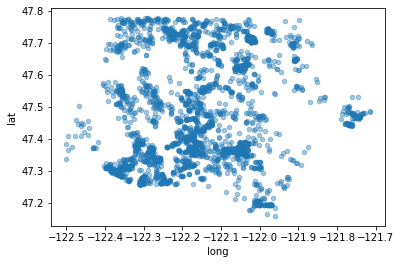

In [24]:
#Map of all of the datapoints
data.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show();

In [25]:
seattle_locations = Seattle_Homes[["lat", "long", "id"]]

In [26]:
notSeattle_locations = NotSeattle_Homes[["lat", "long", "id"]]

In [27]:
#Create an interactive map of homes
import folium
from folium.plugins import FastMarkerCluster
from branca.element import Template, MacroElement

#Create a blank map
map = folium.Map(location=[notSeattle_locations.lat.mean(), 
                           notSeattle_locations.long.mean()], zoom_start=9, control_scale=True)

#Index markers for homes Out of Seattle
for index, location_info in notSeattle_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='blue',icon='none')).add_to(map)

#Index markers for homes In Seattle
for index, location_info in seattle_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='orange',icon='none')).add_to(map)

#County outline coordinates    
king_county = [
    [47.777799, -121.998473],
    [47.777799, -122.419374],
    [47.734022, -122.419374],
    [47.503347, -122.419374],
    [47.503347, -122.419374],
    [47.503347, -122.533756],
    [47.324233, -122.533756],
    [47.324233, -122.419374],
    [47.257529, -122.419374],
    [47.257529, -122.249917],
    [47.161605, -121.924595],
    [47.161605, -121.404507],
    [47.373455, -121.404507],
    [47.600453, -121.131500],
    [47.777799, -121.131500],
    [47.777799, -121.998473],
]

# Plot county lines using coordinates
my_PolyLine=folium.PolyLine(locations=king_county,weight=3, color = 'black')
map.add_child(my_PolyLine)


#Create a draggable legend
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:4px; padding: 4px; font-size:14px; right: 15px; bottom: 10px;'>

<div class='legend-title'>Legend</div>

<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:orange;opacity:1.0;'></span>In Seattle</li>
    <li><span style='background:cadetblue;opacity:1.0;'></span>Out of Seattle</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 2px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 14px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map.get_root().add_child(macro)

map